In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\AI-lab\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9691358024691358, Loss: 0.19056320190429688
Checkpoint 200, Accuracy: 0.9691358024691358, Loss: 0.16236132162588615
Checkpoint 300, Accuracy: 0.9691358024691358, Loss: 0.14597674652382178
Checkpoint 400, Accuracy: 0.9691358024691358, Loss: 0.13450339988425927
Checkpoint 500, Accuracy: 0.9691358024691358, Loss: 0.12972697505244501


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.7884537  0.00209973 0.20944655]
[0. 1. 0.] <-> [2.8742023e-02 9.7119391e-01 6.4071079e-05]
[1. 0. 0.] <-> [0.97939897 0.01089406 0.009707  ]
[1. 0. 0.] <-> [0.9223089  0.07427609 0.00341493]
[1. 0. 0.] <-> [0.9484385  0.04740389 0.00415759]
[1. 0. 0.] <-> [0.9788069  0.00725908 0.01393409]
[1. 0. 0.] <-> [0.95873016 0.03631033 0.00495949]
[1. 0. 0.] <-> [0.96238935 0.00487079 0.0327399 ]
[0. 0. 1.] <-> [4.7146376e-02 9.2907940e-05 9.5276070e-01]
[0. 1. 0.] <-> [5.7684634e-02 9.4217217e-01 1.4314795e-04]
[0. 1. 0.] <-> [1.2901746e-01 8.7044382e-01 5.3876871e-04]
[1. 0. 0.] <-> [0.9766337  0.01599532 0.00737085]
[1. 0. 0.] <-> [0.9771707  0.01317912 0.00965025]
[0. 0. 1.] <-> [4.7129538e-02 9.3031318e-05 9.5277745e-01]
[0. 0. 1.] <-> [4.7032945e-02 9.2464601e-05 9.5287466e-01]
[1. 0. 0.] <-> [0.97776574 0.00722137 0.01501283]
[1. 0. 0.] <-> [0.9764837  0.0163609  0.00715551]
[1. 0. 0.] <-> [0.96396226 0.03101593 0.00502184]
[0. 1. 0.] <-> [4.0926017e-02 9.5901358e-01 6.

In [12]:
# Testing Performance

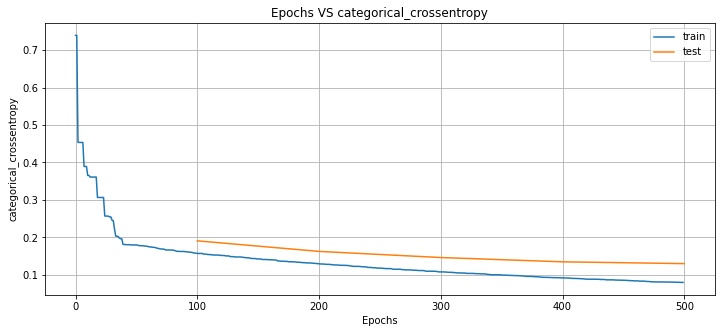

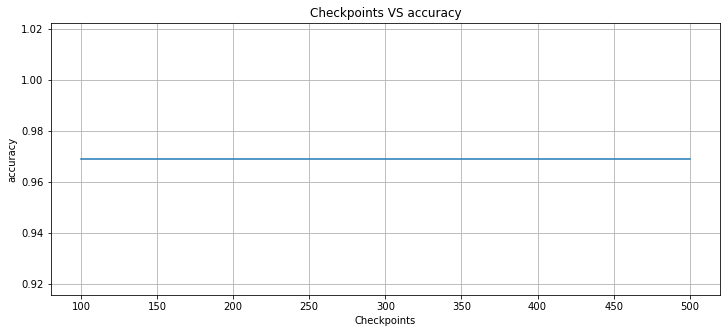

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9691358024691358, 'mean_square_error': 0.08424613141096317, 'categorical_crossentropy': 0.19056320190429688, 'precision': 0.9537037037037037, 'recall': 0.9537037037037037, 'f1': 0.9537037037037037, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 4, 'tn_hit': 24, 'fn_hit': 1}, 1: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 2}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 2}}, 'checkpoint': 100} 


{'accuracy': 0.9691358024691358, 'mean_square_error': 0.07336106885995669, 'categorical_crossentropy': 0.16236132162588615, 'precision': 0.9537037037037037, 'recall': 0.9537037037037037, 'f1': 0.9537037037037037, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 4, 'tn_hit': 24, 'fn_hit': 1}, 1: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 2}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 2}}, 'checkpoint': 200} 


{'accuracy': 0.9691358024691358, 'mean_square_error': 0.06952997627822037, 'categorical_crossentropy': 0.14597674652382178, 'preci

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[ 1.4073784  -2.6694183  -2.0690668   0.2508239   0.62151253]
 bias: 2.545626163482666

Neuron 1: weights:
[ 0.1653747  2.3262823 -1.8918215 -2.3942347 -2.7949252]
 bias: -0.5294221043586731

Neuron 2: weights:
[-0.3309718 -2.0568929 -1.5803739  3.         2.5820193]
 bias: -2.322788953781128

Neuron 3: weights:
[-2.8358822   2.0365076   2.2002888   1.1093746  -0.74411625]
 bias: -0.5959777235984802

$
Layer 2
Neuron 0: weights:
[ 3.         -0.57252717 -2.8479407   0.0673714 ]
 bias: -0.1291728913784027

Neuron 1: weights:
[-3.         1.2976515 -2.5535445  2.6323593]
 bias: -0.655613899230957

Neuron 2: weights:
[ 2.6280022 -2.983624   2.8002276 -1.8000962]
 bias: -2.3965656757354736

$

